# Predicting sale price of bulldozers using machine learning

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [4]:
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory = False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [7]:
df.saledate.dtype

dtype('O')

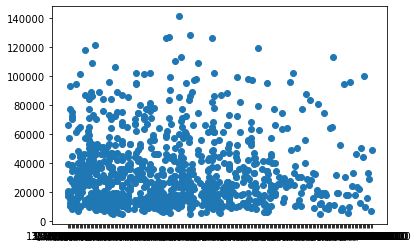

In [8]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

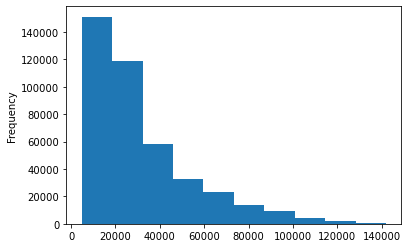

In [9]:
df.SalePrice.plot.hist();

# Parsing dates

In [10]:
# Import data again but this time parse dates
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=['saledate'])

In [11]:
df.saledate.dtype

dtype('<M8[ns]')

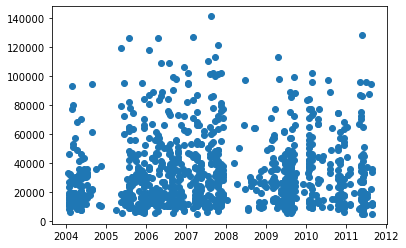

In [12]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [13]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [14]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [15]:
# sort dataframe by saledate
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [16]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [17]:
# Make a copy
df_temp = df.copy()

In [18]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


 Add datetime parameters to `saledate` column

In [20]:
df_temp['saleYear'] = df_temp.saledate.dt.year
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayOfWeek'] = df_temp.saledate.dt.dayofweek
df_temp['saleDayOfYear'] = df_temp.saledate.dt.dayofyear

In [21]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [24]:
# Now we have encriched the df with dattime params we can remove the saledate column
df_temp.drop('saledate', axis=1, inplace=True)

In [25]:
df_temp.saledate

AttributeError: 'DataFrame' object has no attribute 'saledate'

In [26]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

# Modelling

In [27]:
from sklearn.ensemble import RandomForestRegressor


In [28]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [29]:
# Converting Data into numbers
pd.api.types.is_string_dtype(df_temp['UsageBand'])

True

In [30]:
# Find the columns containing strings
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content) == True:
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [33]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content) == True:
        print(content)
        break

205615    NaN
274835    NaN
141296    NaN
212552    NaN
62755     NaN
         ... 
410879    NaN
412476    NaN
411927    NaN
407124    NaN
409203    NaN
Name: UsageBand, Length: 412698, dtype: object


In [31]:
# convert all strings into datatype of category
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()

In [56]:
df_temp.state.dtype

dtype('int8')

In [36]:
df_temp.isna().sum() / len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [38]:
# Save preprocessed data
df_temp.to_csv('data/bluebook-for-bulldozers/train_temp.csv',
          index=False)

In [40]:
# Import preprocessed data
df_temp = pd.read_csv("data/bluebook-for-bulldozers/train_temp.csv",
                      low_memory=False)
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [41]:
# check which columns are numeric

for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [42]:
# check which numeric columns
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [43]:
# fill numeric values with median
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label+'is_missing'] = pd.isnull(content)
            df_temp[label] = content.fillna(content.median())

In [46]:
# check if there are missing numeric values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [47]:
df_temp.auctioneerIDis_missing.value_counts()

False    392562
True      20136
Name: auctioneerIDis_missing, dtype: int64

In [48]:
df_temp.isnull().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

In [51]:
df_temp.state.dtype

dtype('O')

In [59]:
# fill the missing categorical values
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label+'_ismissing'] = pd.isnull(content)
        df_temp[label] = pd.Categorical(content).codes + 1
        

In [60]:
df_temp.state.dtype

dtype('int8')

In [61]:
df_temp.state

0         44
1          9
2          9
3          9
4          9
          ..
412693     5
412694     5
412695     5
412696     5
412697     5
Name: state, Length: 412698, dtype: int8

In [68]:
df_temp.T

,0,1,2,3,4,5,6,7,8,9,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1998,2005,2005,2004,2000,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UsageBand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fiModelDesc,4593,1820,2348,1819,2119,2298,3126,979,2224,82,...,989,536,4261,4818,1319,2101,240,627,83,989


In [70]:
df_temp.isna().sum()[:10]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
dtype: int64

In [71]:
df_temp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [72]:
df_temp.saleMonth

0         1
1         1
2         1
3         1
4         1
         ..
412693    4
412694    4
412695    4
412696    4
412697    4
Name: saleMonth, Length: 412698, dtype: int64

In [73]:
# splitting data into training and validation
df_val = df_temp[df_temp['saleYear'] == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [75]:
# split data into X and y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val.SalePrice


In [76]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 58), (401125,), (11573, 58), (11573,))

In [81]:
# create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
     Calculates root mean squared log error between predictions
     and true labels
    '''
    
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# create function to evaluate model on a few different levels
def show_score(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    score = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, val_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "Valid RMSLE": rmsle(y_valid, val_preds),
        "Traning R^2": r2_score(y_train, train_preds),
        "Valid R^2": r2_score(y_valid, val_preds)
    }
    
    return score

##  Reducing data to train models faster

In [112]:
# create a model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [113]:
%%time
model.fit(X_train, y_train)

Wall time: 6.77 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [114]:
show_score(model)

{'Training MAE': 5554.061618822063,
 'Valid MAE': 7139.615822172297,
 'Training RMSLE': 0.25758465681614984,
 'Valid RMSLE': 0.29248380187626777,
 'Traning R^2': 0.8608402371243158,
 'Valid R^2': 0.83308596217853}

In [86]:
model.predict(X_train)[:10]

array([19090. , 17890. , 42623.5, 17829. , 19058.5, 29589.5, 31991. ,
       14961. , 68240. , 13881. ])

In [87]:
y_train[:10]

0     9500.0
1    14000.0
2    50000.0
3    16000.0
4    22000.0
5    23500.0
6    31000.0
7    11750.0
8    63000.0
9    13000.0
Name: SalePrice, dtype: float64

In [89]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparametrs
rf_grid = {
    "n_estimators": np.arange(1, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt", "auto"],
    "max_samples": [10000]
}

# Instantiate RandomForestRegressor hyperparameter
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, 
                                                    random_state=42),
                              param_distributions=rf_grid,
                              cv=5,
                              verbose=True,
                              n_iter=2
                             )

# fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 28 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
                   verbose=True)

In [90]:
rs_model.best_params_

{'n_estimators': 31,
 'min_samples_split': 18,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [91]:
show_score(rs_model)

{'Training MAE': 7196.721684450513,
 'Valid MAE': 8348.392924766613,
 'Training RMSLE': 0.31806694740002384,
 'Valid RMSLE': 0.3374509983281911,
 'Traning R^2': 0.7788150309173747,
 'Valid R^2': 0.7799505972141529}

In [119]:
%%time

# most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

# fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 23.7 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [120]:
show_score(ideal_model)

{'Training MAE': 2951.123355082265,
 'Valid MAE': 5966.934781951541,
 'Training RMSLE': 0.144427431435229,
 'Valid RMSLE': 0.246251621813037,
 'Traning R^2': 0.9589090179371786,
 'Valid R^2': 0.8819835895768973}

## Make predictions on test data using ideal model

In [94]:
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=['saledate'])

In [95]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


# Preprocessing data to fit the format of training set

In [108]:
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])

In [102]:
def preprocess_data(df):
    '''
    Performs transformations on df and returns transformed df
    '''
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    
    df.drop('saledate', axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+'is_missing'] = pd.isnull(content)
                df[label] = content.fillna(content.median())
            
    # fill categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'missing'] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
        
    
    
    return df

In [104]:
# process the test data
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=['saledate'])

In [105]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthmissing,Stick_Lengthmissing,Thumbmissing,Pattern_Changermissing,Grouser_Typemissing,Backhoe_Mountingmissing,Blade_Typemissing,Travel_Controlsmissing,Differential_Typemissing,Steering_Controlsmissing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [106]:
X_train.shape

(401125, 58)

In [109]:
df_temp = preprocess_data(df)
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthmissing,Stick_Lengthmissing,Thumbmissing,Pattern_Changermissing,Grouser_Typemissing,Backhoe_Mountingmissing,Blade_Typemissing,Travel_Controlsmissing,Differential_Typemissing,Steering_Controlsmissing
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,2,963,...,True,True,True,True,True,True,True,True,False,False
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,2,1745,...,True,True,True,True,True,True,True,True,False,False
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,1,336,...,True,True,True,True,True,True,True,True,True,True
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,1,3716,...,True,True,True,True,True,True,True,True,True,True
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,3,4261,...,True,True,True,True,True,True,True,True,True,True


In [110]:
df_val = df_temp[df_temp['saleYear'] == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

In [111]:
# split data into X and y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val.SalePrice


In [115]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthmissing,Stick_Lengthmissing,Thumbmissing,Pattern_Changermissing,Grouser_Typemissing,Backhoe_Mountingmissing,Blade_Typemissing,Travel_Controlsmissing,Differential_Typemissing,Steering_Controlsmissing
0,1139246,999089,3157,121,3.0,2004,68.0,2,963,298,...,True,True,True,True,True,True,True,True,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,2,1745,529,...,True,True,True,True,True,True,True,True,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,336,111,...,True,True,True,True,True,True,True,True,True,True
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3716,1381,...,True,True,True,True,True,True,True,True,True,True
4,1139253,1057373,17311,121,3.0,2007,722.0,3,4261,1538,...,True,True,True,True,True,True,True,True,True,True


In [116]:
set(X_train.columns).difference(set(df_test.columns))

{'auctioneerIDis_missing'}

In [117]:
# Manually adjust the auctioneerIDis_missing
df_test['auctioneerIDis_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthmissing,Thumbmissing,Pattern_Changermissing,Grouser_Typemissing,Backhoe_Mountingmissing,Blade_Typemissing,Travel_Controlsmissing,Differential_Typemissing,Steering_Controlsmissing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [121]:
# finally make predictions the test data
test_preds = ideal_model.predict(df_test)
test_preds

array([20962.48769196, 19827.3550391 , 50104.98947283, ...,
       17066.32563906, 22990.1563963 , 31353.97590649])

In [122]:
# formatting it correctly
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,20962.487692
1,1227844,19827.355039
2,1227847,50104.989473
3,1227848,66376.658700
4,1227863,45999.360583
...,...,...
12452,6643171,45330.723460
12453,6643173,16182.342102
12454,6643184,17066.325639
12455,6643186,22990.156396


In [123]:
# export prediction data to csv
df_preds.to_csv('data/bluebook-for-bulldozers/test_predictions.csv')

In [130]:
# Helper function to plot feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({ "Features": columns,
                         "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # plot dataframe
    fig, ax = plt.subplots()
    ax.barh(df['Features'][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

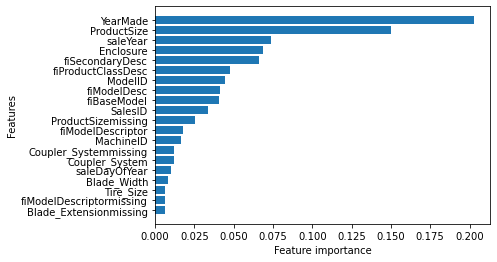

In [131]:
plot_features(X_train.columns, ideal_model.feature_importances_)